# Hands-on Session 4
## Wed, Jul 12
---
Topics
* The Simulation class
* Voter model
* Co-evolution model
* SIS model


This tutorial will show you how to use the included Simulation class to simulate node dynamics by specifying a graph, the initial state of the nodes, and node state transitions.



In [1]:
%%capture out
%%bash
wget https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/tutorials/simulation.py

In [93]:
%matplotlib inline
import networkx as nx
import string
import random
import matplotlib.pyplot as plt

from simulation import Simulation

# 1. The Simulation class

Included with these tutorials is a `simulation.py` file that contains a `Simulation` class. This class will allow us to skip the details of writing a simulation, allowing us to concentrate on the interesting parts.

## 1.1 Creating a simulation

A simulation is made up of three main parts:

1. The graph on which to simulate node dynamics
2. The initial state of each node
3. The state transition function

### 1.1.1 The graph

This one is easy, we just need a NetworkX Graph instance. For this example we'll use a random graph. You can run the following cell multiple times if you wish, until you get a graph that looks good:

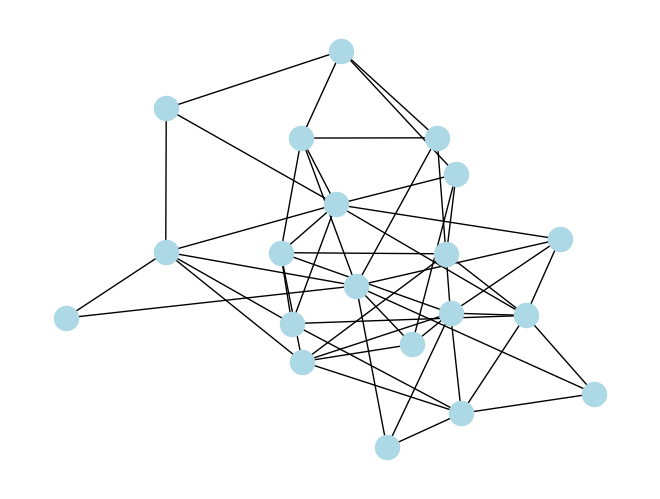

In [3]:
G = nx.gnm_random_graph(20, 50, seed=5)
nx.draw(G, node_color='lightblue')

### 1.1.2 The initial state

In these simulations, state is represented as a dictionary where the keys are node names and the values are the state of the node. We can specify the initial state either directly as one of these dictionaries, or we can specify a function that generates such a state dictionary.

The function version is cleaner; let's use it to generate a very simple initial state where every node has the same state: 'asleep'.

In [4]:
# An initial_state function takes one argument, the graph instance.

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state

We can test this function out to make sure it works on our graph and produces a dictionary with a state value for each node:

In [5]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

This looks good.

### 1.1.3 The state transition function

The crux of the simulation is the state transition function: this is where we specify the *dynamics*. This function takes two arguments, the graph and the current node states provided as a dictionary, and should return a dictionary of the updated states.

In this simple example, at each simulation step, each node with the `'asleep'` state will have a fixed probability to transition to the `'awake'` state. We'll specify this probability as `P_AWAKEN`, the probability an asleep node will awaken at each step.

Generically, in order to do a thing with some probability, we generate a random number between 0 and 1 with the `random.random()` function and compare to our probability threshold: if the random number is below our probability threshold, then we do the thing.

In [ ]:
P_AWAKEN = 0.2

def state_transition(G, current_state):
    next_state = {}

    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'

    return next_state

Note that this function only has to provide the states that *change* during this step, although no harm would be done by specifying the state for every node, changed or not.

We can do a dry run if we want, just to make sure our transition function works:

In [ ]:
test_state = initial_state(G)
state_transition(G, test_state)

{3: 'awake', 4: 'awake', 11: 'awake'}

We should see some nodes transition to the `'awake'` state in this test run, which is good.

### 1.1.4 Putting together the pieces

We now have our three pieces: the graph, the initial state, and the state transition function. Let's put them together along with a name for our simulation to create a Simulation object:

In [ ]:
sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

The `name` provided here is optional, it just for us to keep track of the images we'll generate later.

This Simulation object has several useful methods. The first of these is the `.state()` method, which returns a dictionary for the current state of the simulation:

In [ ]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

We haven't done any steps in the simulation yet, so the state should be exactly our initial condition.

We can also draw the network with its nodes colored by their state values with the `.draw()` method:

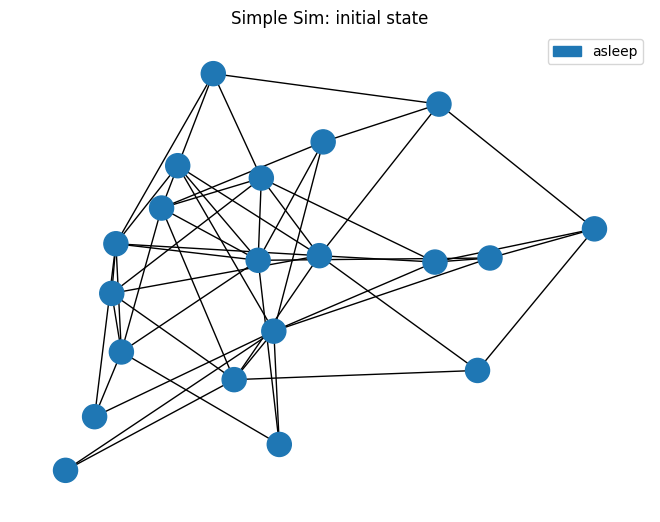

In [ ]:
sim.draw()

Our initial condition has all nodes `'asleep'`, so this checks out.

## 1.2 Running the simulation

With our initial condition checked out, let's run the simulation! The simulation will advance in discrete *steps*: each step is one run of the state transition function.

The `.run()` method without any arguments will run the simulation one step:

In [ ]:
sim.run()

We can confirm the simulation advanced a step by checking out the `.steps` property, which tells us how many times the state transition function has been run:

In [ ]:
sim.steps

1

Let's see what our graph looks like after one step, noting that we can include keyword arguments for the `nx.draw()` function:

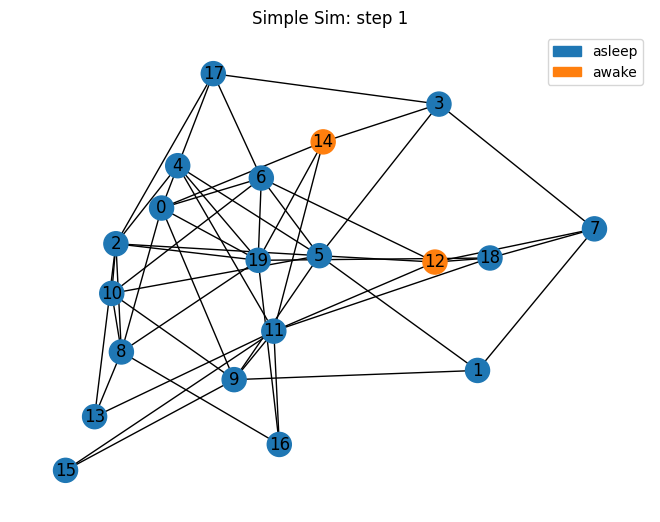

In [ ]:
sim.draw(with_labels=True)

Some of the nodes are awake! We can also see this in the simulation state:

In [ ]:
sim.state()

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

If we give the `.run()` method a number, we can run the simulation several steps at once:

In [ ]:
sim.run(10)

In [ ]:
sim.steps

31

The `.steps` method confirms that our simulation went through several simulation steps. Let's check up on the current state:

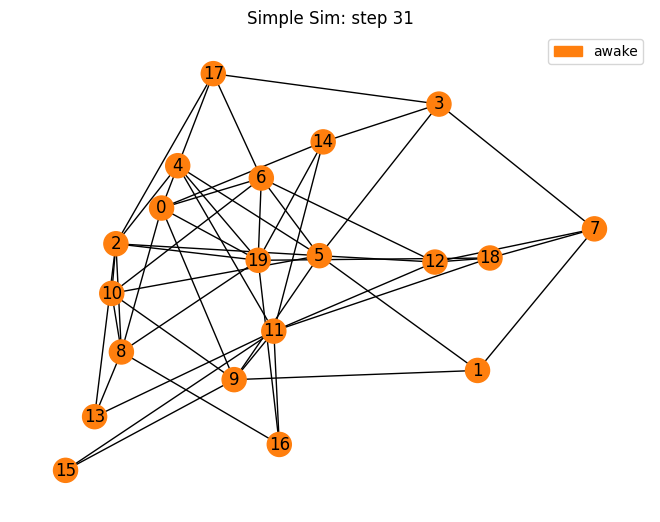

In [ ]:
sim.draw(with_labels=True)

## 1.3 Visualizing the results

By this point, all or most of the nodes should be awake, but how did that transition occur? Was it gradual or all at once? With the `.plot()` method, we can plot the proportion of nodes in each state at each step of the simulation:

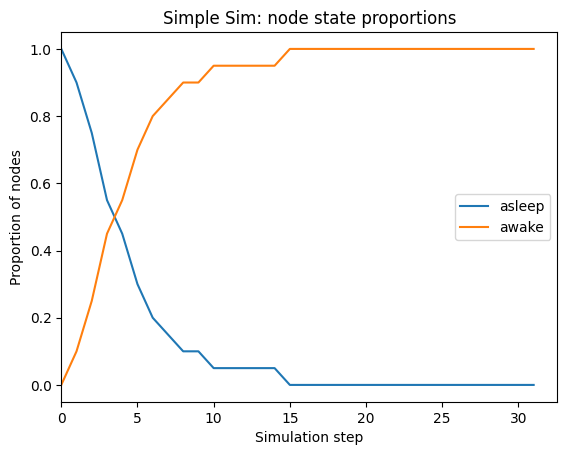

In [ ]:
sim.plot();

If we want to visualize the state of the graph at a specific step, we can specify the desired step in the `.draw()` function.

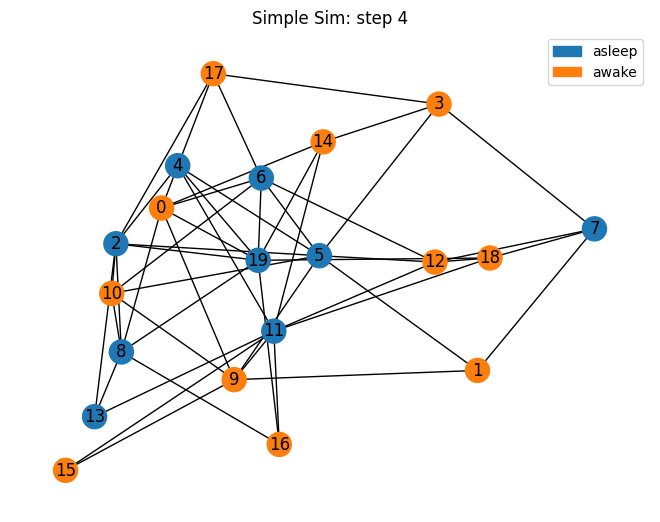

In [ ]:
sim.draw(4, with_labels=True)

The same is true for the `.state()` method:

In [ ]:
sim.state(4)

{0: 'awake',
 1: 'awake',
 2: 'asleep',
 3: 'awake',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'awake',
 10: 'awake',
 11: 'asleep',
 12: 'awake',
 13: 'asleep',
 14: 'awake',
 15: 'awake',
 16: 'awake',
 17: 'awake',
 18: 'awake',
 19: 'asleep'}

If we only want to plot a subset of the steps, we can do that too by passing the min and/or max steps we want to plot. Do note that the bounds passed to the `.plot()` method are half-open, like Python's `range()` function and list slices, so that `.plot(2, 8)` plots states from 2 and up to but *not* including 8.

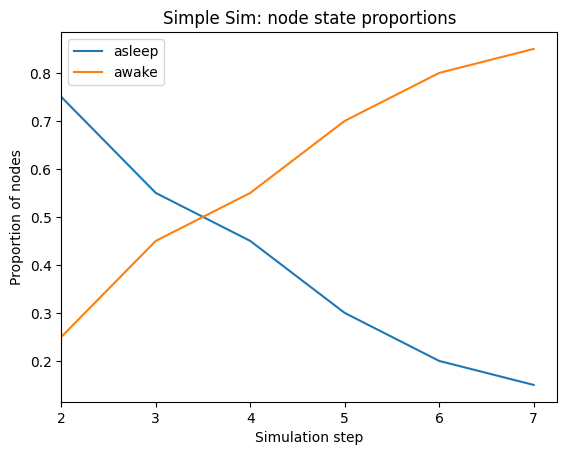

In [ ]:
sim.plot(min_step=2, max_step=8);

# 2. The voter model

In our trivial awake/asleep model above we ignored the underlying graph structure and each node's dynamics was independent of its neighbors. In interesting network models, we make use of the graph connectivity in some way.

The voter model is a simple model of network opinion dynamics capable of producing interesting output. This model is described in detail in the textbook; we're going to implement it here.

## 2.1 Create the simulation

### 2.1.1 The Graph

We're going to use another random graph here, same as before.

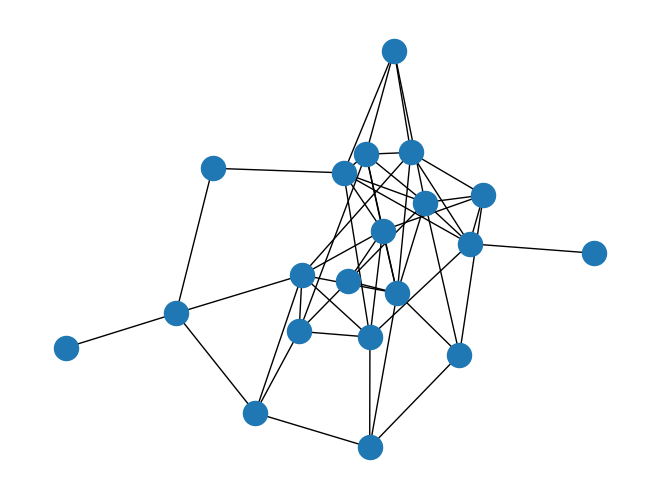

In [ ]:
G = nx.gnm_random_graph(20, 50, seed=42)
nx.draw(G)

### 2.1.2 Initial state

For the initial state, we will randomly assign each node a state by randomly selecting a letter A to D -- we're not limited to two states here!

We'll make use of `random.choice()` in both the initial state and state transition functions. This function is used to randomly choose one item from a given collection.

In [ ]:
def initial_state_voter(G):
    state = {}

    for node in G.nodes:
        state[node] = random.choice(['A', 'B', 'C', 'D'])

    return state

Let's make sure this works:

In [ ]:
initial_state_voter(G)

{0: 'B',
 1: 'C',
 2: 'C',
 3: 'D',
 4: 'C',
 5: 'A',
 6: 'B',
 7: 'B',
 8: 'D',
 9: 'D',
 10: 'C',
 11: 'D',
 12: 'A',
 13: 'D',
 14: 'B',
 15: 'A',
 16: 'B',
 17: 'A',
 18: 'C',
 19: 'D'}

### 2.1.3 State transition

The algorithm at the heart of the voter model works like this: for each node in the graph, choose a neighbor at random and copy their "opinion", *i.e.* set this node's state to the same value as that of the neighbor.

* For each node in the graph
  * Choose a neighbor at random
  * Set this node state equal to the neighbor state

In [ ]:
def state_transition_voter(G, current_state):
    next_state = {}

    for node in G.nodes:
        # Caveat: what if the node has no neighbors?
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]

    return next_state

Let's test this out before moving forward:

In [ ]:
test_state = initial_state_voter(G)
state_transition_voter(G, test_state)

{0: 'C',
 1: 'D',
 2: 'D',
 3: 'D',
 4: 'B',
 5: 'B',
 6: 'D',
 7: 'D',
 8: 'D',
 9: 'D',
 10: 'C',
 11: 'D',
 12: 'D',
 13: 'B',
 14: 'B',
 15: 'C',
 16: 'B',
 17: 'A',
 18: 'D',
 19: 'D'}

###  2.1.4 The Simulation instance

Looks good. Now let's create the simulation and visualize the initial state:

In [ ]:
sim = Simulation(
    G, initial_state_voter, state_transition_voter, name='Voter Model'
)

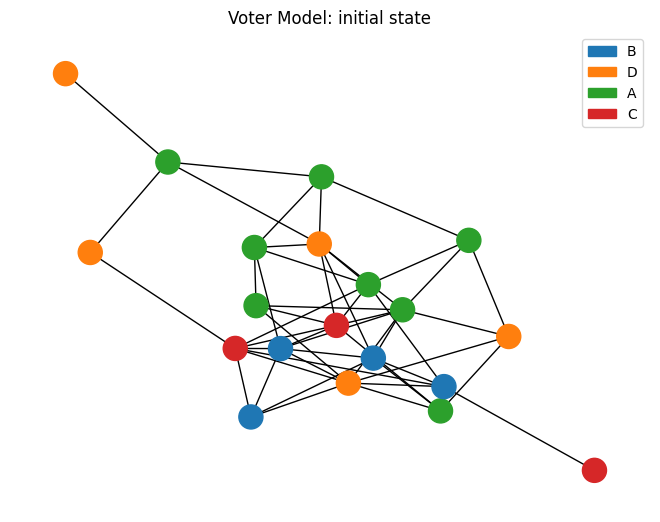

In [ ]:
sim.draw();

## 2.2 Run the simulation

Let's run this simulation several steps and see where we end up:

In [ ]:
sim.run(40)

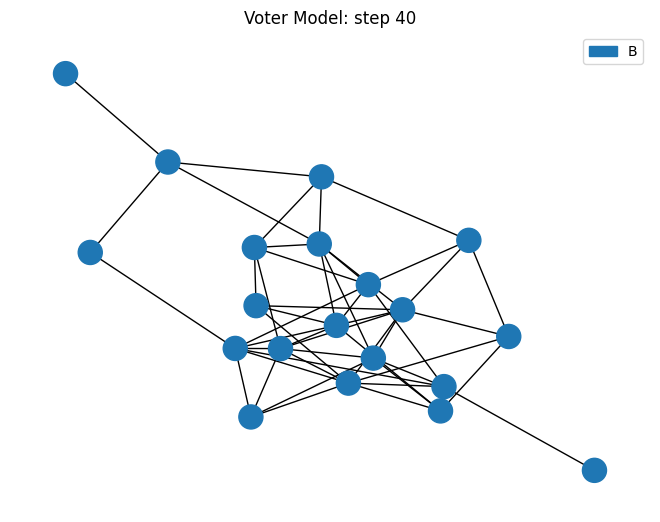

In [ ]:
sim.draw()

## 2.3 Visualize the results

It's probably different from where we started; let's see how we got here:

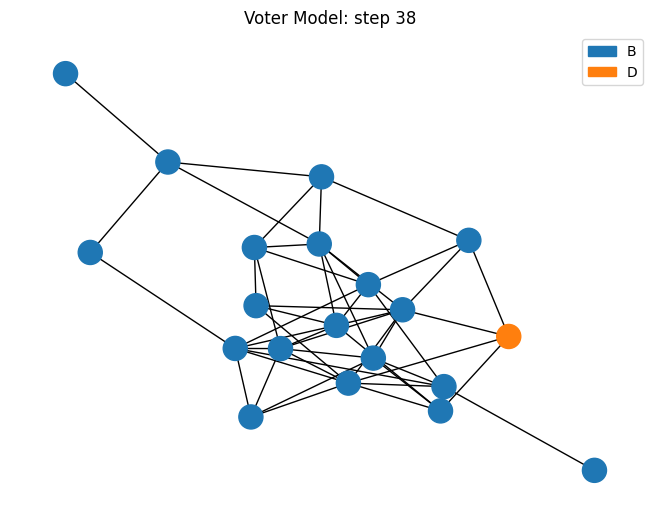

In [ ]:
sim.draw(38)

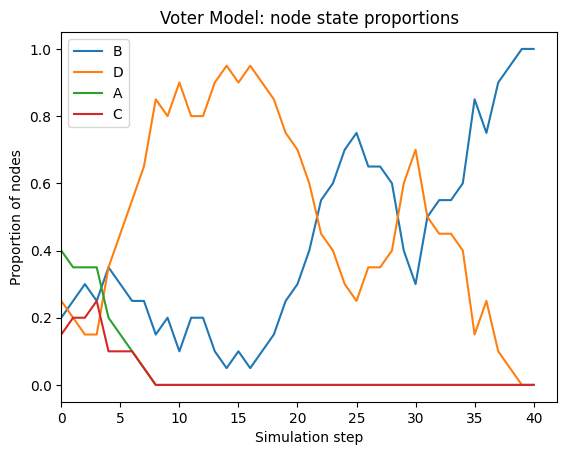

In [ ]:
sim.plot();

Go ahead and execute the previous few cells again, running the simulation forward and examining the state, until it reaches the long-term steady state: all of the nodes should eventually end up with the same state.

## 2.4 Synchronous vs. asynchronous updates

As written, this `state_transition` function performs a **synchronous** update, *i.e.* all of the nodes' states are updated at the same time, after the function returns the new state:

In [ ]:
# This is the same as in 2.1.3

def state_transition_voter_sync(G, current_state):
    next_state = {}

    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]

    return next_state

Note how this function never changes the values of `current_state` so that each node's update is based on the same information. Since each node "sees" the same state, the order in which we update the nodes doesn't matter. This is equivalent to updating all of the node states simultaneously.

One can instead perform an **asynchronous** update, where each node sees the state changes that have taken place this step, by making in-place changes to `current_state`:

In [ ]:
# This example is potentially biased, don't use it

def state_transition_voter_async_problematic(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]

    return current_state

In this example, each node's view of `current_state` reflects the changes made in this step by previous node updates.

There is a potential problem here, however: `G.nodes` is likely to always return the nodes in the same order, thus performing the updates in the same order and potentially introducing bias. We should instead loop over the nodes in a random order each time:

In [ ]:
def state_transition_voter_async(G, current_state):
    # Randomizing the update order prevents bias
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)

    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]

    return current_state

We can make use of this new state transition function by passing it to the `Simulation` class, then run it and compare to the synchronous version above.

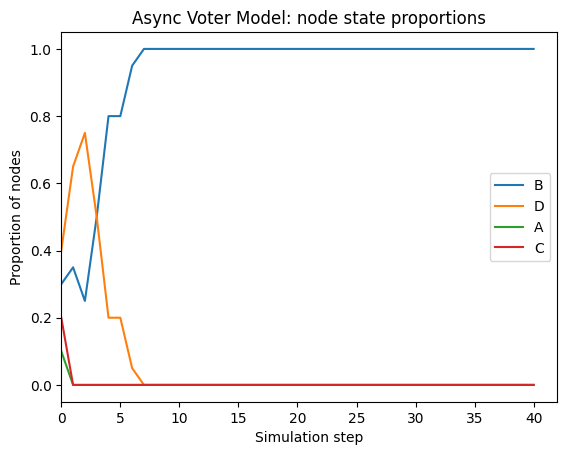

In [ ]:
sim = Simulation(
    G, initial_state_voter, state_transition_voter_async,
    name='Async Voter Model'
)
sim.run(40)
sim.plot();

Asynchronous updates may or may not produce a different result depending on the particular dynamics of your simulation. Synchronous updates are slightly simpler in terms of their assumptions which is an advantage, but certain update mechanisms can fail to converge to the steady state without asynchronous updates.

## 2.5 Stop condition

In some situations we may want to specify a condition which, when true, causes the simulation to end early. In this Voter model example, we observe that the system state can't change once all of the nodes have the same state. In order to avoid running the simulation longer than necessary, we can specify a stop condition to stop the simulation if all nodes have the same state.

This function takes the graph and current state as arguments, same as the state transition function, and returns `True` if the model should stop.

In [ ]:
def stop_condition_voter(G, current_state):
    unique_state_values = set(current_state.values())

    is_stopped = len(unique_state_values) <= 1
    return is_stopped

Let's create another instance of the voter model, specifying a stop condition, and run it for more steps than we think we'll need. We still need to specify a maximum number of steps in case there is a bug in our stop condition and it never returns True.

In [ ]:
sim = Simulation(
    G, initial_state_voter, state_transition_voter, stop_condition_voter,
    name='Voter model',
)
sim.run(100)

Stop condition met at step 12.


In [ ]:
sim.steps

12

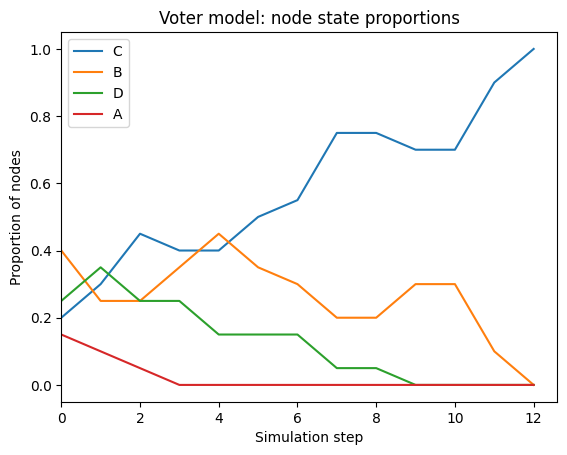

In [ ]:
sim.plot();

# 3. Co-evolution model

Now we look at a more realistic class of models called coevolution models, which allow for the interplay of both influence and selection.  
The opinion changes may induce modifications in the network structure, which could in turn affect the opinions, and so on. Basically, opinions and networks adapt to each other.

## 3.1 Create the simulation

### 3.1.1 The Graph

We're going to use another random graph here, same as before.


<!-- Since we have access to the Graph instance in our transition function, we can add or remove links in the graph if our system calls for it. Let's add an extension to the voter model such that a node may also "unfriend" another node by removing the edge between them if their state differs. -->

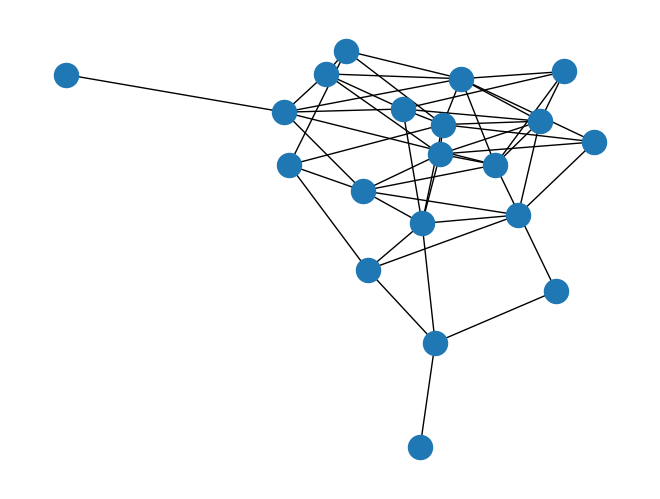

In [ ]:
G = nx.gnm_random_graph(20, 50, seed=42)
nx.draw(G)

### 3.1.2 Initial state

For the initial state, we will randomly assign each node a state to one of two states.  
We'll make use of `random.choice()` in both the initial state and state transition functions.

In [40]:
def initial_state_coevolution(G):
    state = {}

    for node in G.nodes:
        state[node] = random.choice(['A', 'B'])

    return state

Let's make sure this works:

In [41]:
initial_state_coevolution(G)

{0: 'B',
 1: 'A',
 2: 'A',
 3: 'B',
 4: 'B',
 5: 'B',
 6: 'B',
 7: 'B',
 8: 'A',
 9: 'A',
 10: 'B',
 11: 'A',
 12: 'A',
 13: 'B',
 14: 'A',
 15: 'B',
 16: 'A',
 17: 'B',
 18: 'A',
 19: 'A',
 20: 'A',
 21: 'B',
 22: 'A',
 23: 'B',
 24: 'B',
 25: 'B',
 26: 'B',
 27: 'B',
 28: 'A',
 29: 'B',
 30: 'A',
 31: 'A',
 32: 'B',
 33: 'A',
 34: 'A',
 35: 'B',
 36: 'A',
 37: 'B',
 38: 'B',
 39: 'B',
 40: 'A',
 41: 'A',
 42: 'A',
 43: 'A',
 44: 'A',
 45: 'A',
 46: 'A',
 47: 'A',
 48: 'B',
 49: 'A',
 50: 'B',
 51: 'A',
 52: 'A',
 53: 'A',
 54: 'B',
 55: 'A',
 56: 'B',
 57: 'A',
 58: 'A',
 59: 'B',
 60: 'A',
 61: 'B',
 62: 'A',
 63: 'B',
 64: 'B',
 65: 'B',
 66: 'B',
 67: 'B',
 68: 'A',
 69: 'B',
 70: 'A',
 71: 'B',
 72: 'B',
 73: 'B',
 74: 'B',
 75: 'A',
 76: 'A',
 77: 'A',
 78: 'A',
 79: 'B',
 80: 'B',
 81: 'A',
 82: 'B',
 83: 'A',
 84: 'A',
 85: 'B',
 86: 'B',
 87: 'B',
 88: 'B',
 89: 'A',
 90: 'A',
 91: 'B',
 92: 'A',
 93: 'B',
 94: 'A',
 95: 'B',
 96: 'B',
 97: 'B',
 98: 'A',
 99: 'A'}

### 3.1.3 State transition

Each iteration of the coevolution model requires a sweep over the nodes, syn- chronously or in random order.

When we examine node $i$, we select a random neighbor $j$ with **different** opinion from $i$:

1. With probability $p$, the link between $i$ and $j$ is **rewired** from $i$ to a randomly selected **non-neighbor** holding the **same** opinion as $i$ (_selection_).

2. Else, (with probability $1 − p$), $i$ takes the opinion of $j$ (_influence_).

The selection probability p is the single parameter of the model.

In [42]:
SELECT_PROB = 0.2

def state_transition_coevolution_sync(G, current_state):
    next_state = {}

    for i in G.nodes:
        if G.degree(i) > 0:
            ## set of neighbors with different opinion
            neighbor_diff_opinion = [
                nbr for nbr in G.neighbors(i)
                if current_state[i] != current_state[nbr]
            ]

            if len(neighbor_diff_opinion) > 0:
                ## select a random j with different opinion
                j = random.choice(neighbor_diff_opinion)

                if random.random() < SELECT_PROB:  # selection
                    ## find non-neighbors of i with same opinion
                    non_neighbor_same_opinion = (
                        set(
                            node for node, op in current_state.items()
                            if (node != i and op == current_state[i])
                        )
                        - set(G.neighbors(i))
                    )
                    if len(non_neighbor_same_opinion) > 0:  # rewire edge
                        k = random.choice(list(non_neighbor_same_opinion))

                        ## remove existing edge between i and j
                        G.remove_edge(i, j)
                        ## add new edge between between i and k
                        G.add_edge(i, k)

                else:  # influence
                    next_state[i] = current_state[j]

    return next_state

Let's test this out before moving forward:

In [43]:
test_state = initial_state_coevolution(G)
state_transition_coevolution_sync(G, test_state)

{0: 'A',
 1: 'B',
 2: 'B',
 4: 'A',
 5: 'B',
 8: 'B',
 9: 'A',
 10: 'B',
 11: 'B',
 13: 'B',
 14: 'A',
 15: 'A',
 19: 'A',
 20: 'B',
 21: 'B',
 23: 'A',
 25: 'B',
 26: 'A',
 27: 'B',
 29: 'A',
 30: 'A',
 32: 'B',
 33: 'B',
 34: 'B',
 35: 'B',
 36: 'B',
 37: 'B',
 38: 'A',
 39: 'B',
 40: 'A',
 43: 'A',
 45: 'B',
 46: 'A',
 47: 'B',
 49: 'B',
 50: 'B',
 52: 'A',
 53: 'B',
 54: 'B',
 55: 'A',
 56: 'B',
 59: 'A',
 60: 'B',
 62: 'A',
 65: 'A',
 66: 'A',
 67: 'B',
 68: 'A',
 69: 'A',
 70: 'B',
 71: 'B',
 72: 'A',
 73: 'B',
 74: 'B',
 76: 'A',
 77: 'A',
 78: 'B',
 79: 'B',
 80: 'B',
 81: 'B',
 82: 'A',
 83: 'A',
 84: 'A',
 85: 'A',
 86: 'A',
 88: 'A',
 89: 'A',
 90: 'A',
 91: 'A',
 92: 'A',
 94: 'A',
 96: 'A',
 97: 'B',
 98: 'B'}

###  2.1.4 The Simulation instance

Looks good. Now let's create the simulation and visualize the initial state:

In [44]:
sim = Simulation(
    G, initial_state_coevolution, state_transition_coevolution_sync,
    name='Coevolution Model'
)

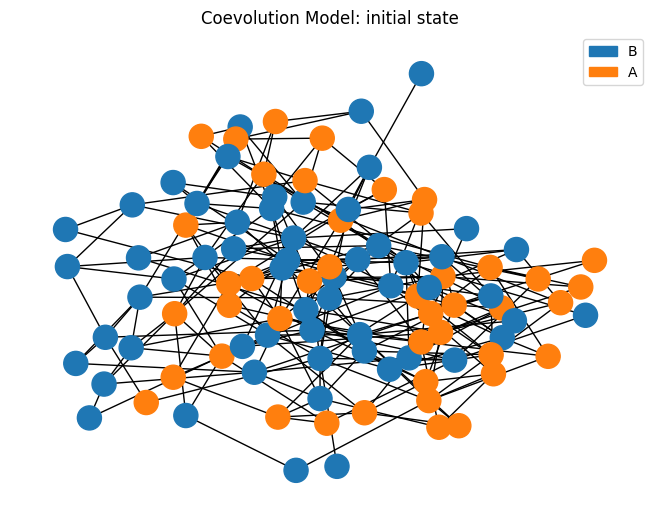

In [45]:
sim.draw();

## 2.2 Run the simulation

Let's run this simulation several steps and see where we end up:

In [46]:
sim.run(20)

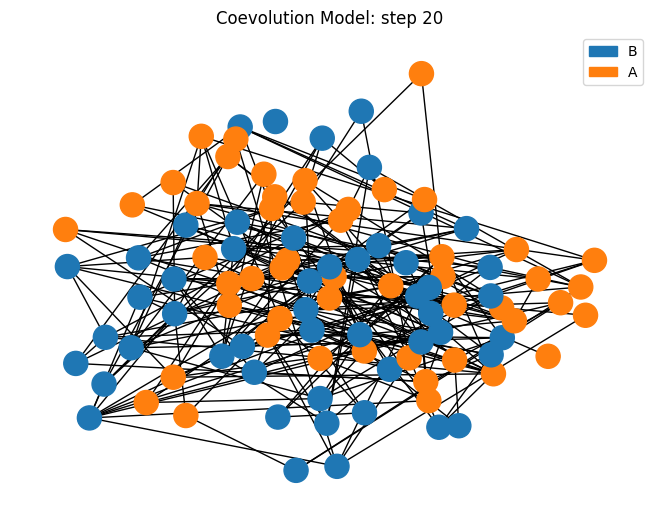

In [47]:
sim.draw()

## 2.3 Visualize the results

It's probably different from where we started; let's see how we got here:

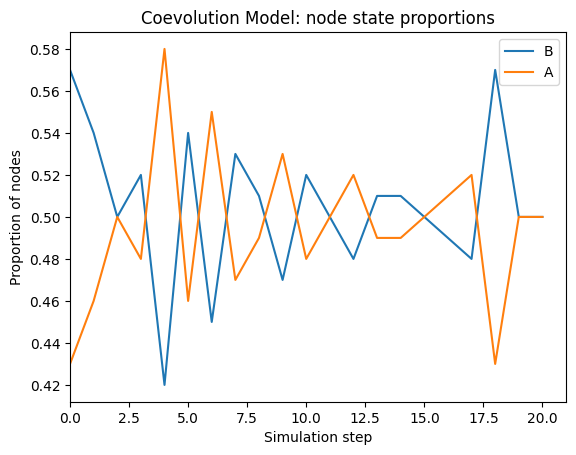

In [48]:
sim.plot();

When the selection probability is high, selection dominates and opinions hardly influence each other. The network becomes segregated into two disconnected components with homogeneous opinions.

Let's confirm that by checking the number of components in $G$.

In [49]:
nx.number_connected_components(sim.G)

2

When the selection probability is close to 0, influence dominates and the net- work structure barely changes. The system will basically homogenize the opinions within the connected components of the initial network.

# Breakout 1

## Q1. Asynchronous update strategy.
When we simulate a dynamic process on a network, there are several ways to asynchronously pick the next node(s) to update.

Typically nodes are selected in a random order. Another strategy would be to select one endpoint of a randomly selected **link**.

Do you think that this would affect the dynamics in any way? Explain why or why not in 2-3 sentences.

Yes, It would affect the dynamics because some nodes have larger degree and they have more chance to get chosen. On the other hand, nodes with less degrees, would be picken less.


## Q2. Simulating the coevolution model for selection probability p=0.01, 0.50, 0.99.

### (a) Add a stopping condition to the coevolution model which stops the model when every node's opinion is the same as **all** of their neighbors.

Implement a function `stop_condition_coevolution` that takes as argument graph a `G` and a current state dict `current_state`.

Use ```G = nx.gnm_random_graph(100, 250, seed=42)```

In [113]:
G = nx.gnm_random_graph(100, 250, seed=42)

In [114]:
def stop_condition_coevolution(G, current_state):
  for c in list(nx.connected_components(G)):
    if len(set([current_state[i] for i in c])) != 1:
      return False
  return True

### (b) Simulate the Coevolution model (with the stopping criteria) for selection probabilities `p = 0.01, 0.50, 0.99`. For each configuration, plot the node state proportions.

Note: you may need to simulate the `p=0.1` and `p=0.50` systems multiple times for ~10k steps for convergence.

In [119]:
probs = [0.1, 0.50, 0.99]

for p in probs:
  SELECT_PROB = p
  sim = Simulation(
      G, initial_state_coevolution, state_transition_coevolution_sync,
      stop_condition_coevolution, name='Coevolution Model'
  )

  sim.run(100000)
  print(sim.steps)
  sim.plot()

100000
100000
Stop condition met at step 3.
3


# 4. The SIS model

This is one of the fundamental models of spreading dynamics on networks link text. We will implement this spreading model using our simulation framework.

## 4.1 Create the Simulation

### 4.1.1 The Graph

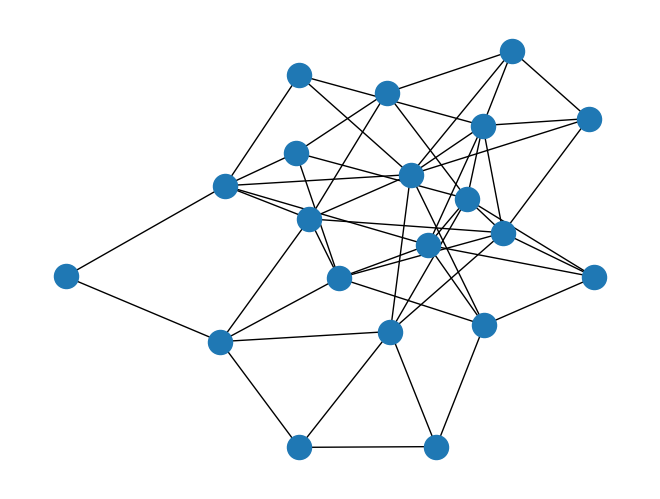

In [ ]:
G = nx.gnm_random_graph(20, 50, seed=50)
nx.draw(G)

### 4.1.2 Initial state

We will initially assign every node to the 'S' state and then randomly choose one node to infect by setting it to the 'I' state. You should experiment with different choices of the "patient zero" node to infect and see how it affects the spreading dynamics, *e.g.* by selecting a high- or low-degree node.

In [17]:
def initial_state_SIS(G):
    state = {}

    for node in G.nodes:  # initialize the states
        state[node] = 'S'

    # pick one patient at random
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'

    return state

Let's make sure this works:

In [18]:
initial_state_SIS(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S',
 20: 'S',
 21: 'I',
 22: 'S',
 23: 'S',
 24: 'S',
 25: 'S',
 26: 'S',
 27: 'S',
 28: 'S',
 29: 'S',
 30: 'S',
 31: 'S',
 32: 'S',
 33: 'S',
 34: 'S',
 35: 'S',
 36: 'S',
 37: 'S',
 38: 'S',
 39: 'S',
 40: 'S',
 41: 'S',
 42: 'S',
 43: 'S',
 44: 'S',
 45: 'S',
 46: 'S',
 47: 'S',
 48: 'S',
 49: 'S',
 50: 'S',
 51: 'S',
 52: 'S',
 53: 'S',
 54: 'S',
 55: 'S',
 56: 'S',
 57: 'S',
 58: 'S',
 59: 'S',
 60: 'S',
 61: 'S',
 62: 'S',
 63: 'S',
 64: 'S',
 65: 'S',
 66: 'S',
 67: 'S',
 68: 'S',
 69: 'S',
 70: 'S',
 71: 'S',
 72: 'S',
 73: 'S',
 74: 'S',
 75: 'S',
 76: 'S',
 77: 'S',
 78: 'S',
 79: 'S',
 80: 'S',
 81: 'S',
 82: 'S',
 83: 'S',
 84: 'S',
 85: 'S',
 86: 'S',
 87: 'S',
 88: 'S',
 89: 'S',
 90: 'S',
 91: 'S',
 92: 'S',
 93: 'S',
 94: 'S',
 95: 'S',
 96: 'S',
 97: 'S',
 98: 'S',
 99: 'S'}

### 4.1.3 State transition

The SIS model involves two parameters:
* $\beta$ is the probability to transition from S to I given an infected neighbor, and
* $\mu$, the probability of transitioning from I to S.

In pseudocode, the algorithm looks like this:

* For each node in the graph
  * If node has state I
    * The node transitions to state S with probability $\mu$
  * Else node has state S
    * For each neighbor of the node
      * If neighbor has state I
        * The node transitions to state I with probability $\beta$

The logic gets a little deep with the indentations, but the code looks very much like this pseudocode.

In [25]:
MU = 0.5  ## I -> S
BETA = 0.5  ## S -> I (neighbor)

def state_transition_SIS(G, current_state):
    next_state = {}

    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'S'  # I -> S transition

        else:      # current_state[node] == 'S'
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'  # S -> I transition

    return next_state

Let's test this out before moving forward:

In [ ]:
test_state = initial_state_SIS(G)
state_transition_SIS(G, test_state)

{}

It's possible, depending on your parameter values, that the first transition results in no state changes. This is okay, even expected. It might take a few tries before any states are updated and a nonempty dict is produced. It's also okay to skip this, as we're just checking our code accuracy, but it is easier to debug here than in the simulation proper.

### 3.1.4 Simulation

Now let's create the simulation and visualize the initial state:

In [ ]:
sim = Simulation(G, initial_state_SIS, state_transition_SIS, name='SIS model')

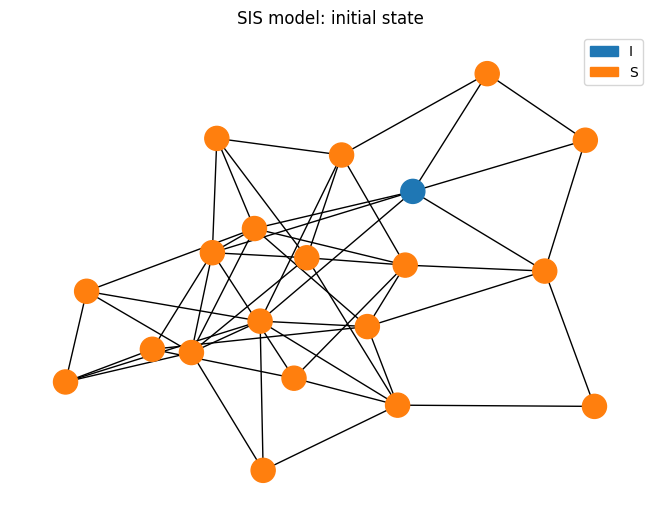

In [ ]:
sim.draw()

## 4.2 Run the simulation

Let's run this simulation several steps and see where we end up:

In [ ]:
sim.run(25)

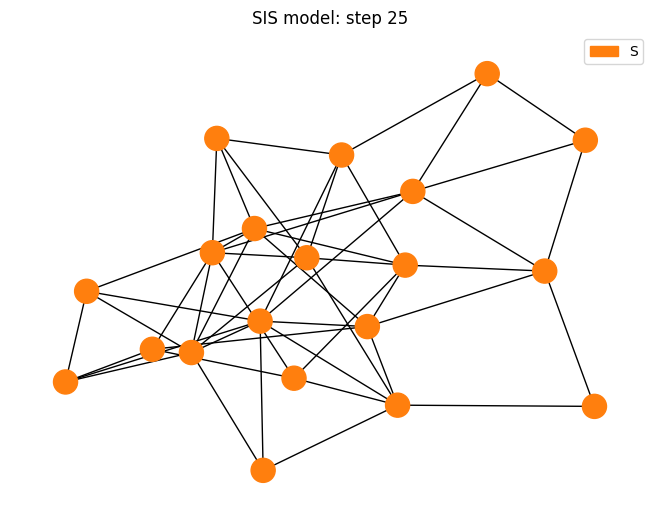

In [ ]:
sim.draw()

It's probably different from where we started; let's see how we got here:

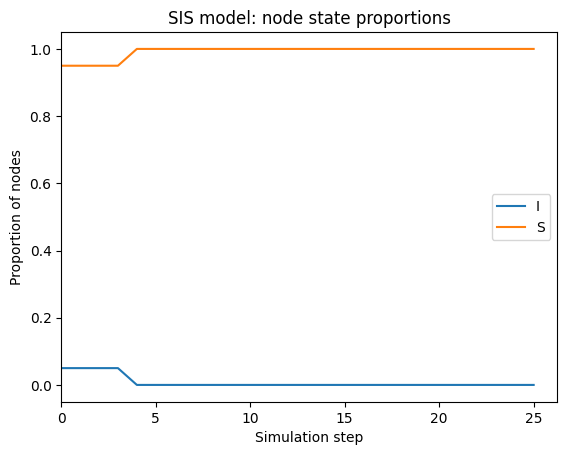

In [ ]:
sim.plot();

Go ahead and execute the previous few cells again, running the simulation forward and examining the state, until it reaches the long-term steady state: eventually the proportion curves will flatten out as the proportion of each node state will fluctuate around some average value.

Now go back, adjust the `BETA` and `MU` parameter values, and see how the steady state changes!

# Conclusion

In each of the "real" models, the voter and SIS models, we executed many of the steps in exactly the same way. This is to clearly illustrate which parts differ between different simulations and which parts remain the same. You can and should definitely experiment with altering these models or writing your own; for example, the threshold model is a straightforward extension of the voter model, and the SIR model is an extension of the SIS model.

# Breakout 2

## Comparing the behavior of SIS models for Erdos-Renyi and Barabasi-Albert models.

### (a) Generate a BA graph (`G_BA`) with 200 nodes, and at each step the new node connects to 4 existing nodes. (Hint: you may use the `nx.barabasi_albert_graph` function.)

In [33]:
G_BA = nx.barabasi_albert_graph(200, 4, seed=42)

### (b) Generate a Gilbert graph (`G_ER`) with the same number of **nodes** as `G_BA` and link probability `0.02`.
(Hint: you may use the `nx.gnp_random_graph` function)

In [34]:
G_ER = nx.gnp_random_graph(200, 0.02, seed=42)

### (c) Simulate the SIS model on both `G_BA` and `G_ER` networks for 100 steps starting with the node with the **maximum** degree being infected. Assume `BETA = MU = 0.1`.

(Hint: copy and modify the `initial_state_SIS` function and call this function in the `Simulation` calls)

In [26]:
def initial_state_SIS(G):
  state = {}

  for n in G.nodes():
    state[n] = 'S'

  max_degree_node = sorted(G_ER.degree, key=lambda x: x[1], reverse=True)[0][0]
  state[max_degree_node] = 'I'

  return state

In [27]:
BETA = MU = 0.1

In [28]:
sim_G_BA = Simulation(G_BA, initial_state_SIS, state_transition_SIS, name='SIS model')
sim_G_ER = Simulation(G_ER, initial_state_SIS, state_transition_SIS, name='SIS model')

sim_G_BA.run(100)
sim_G_ER.run(100)

### (d) Plot the proportion of nodes in each state for `G_BA` and `G_ER`. Also briefly comment on the long-term behavior of the two systems in 2-3 sentences.

<Axes: title={'center': 'SIS model: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

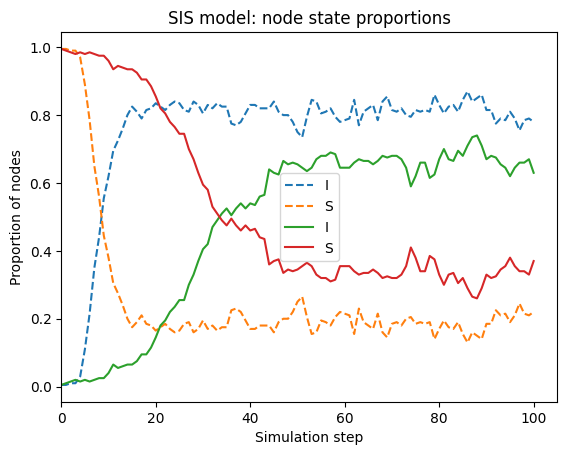

In [32]:
sim_G_BA.plot(linestyle='--')
sim_G_ER.plot()

Both of the networks had the same situation in the dynamic process. As we can say from the plot, the infection spreaded fast in `G_BA` network because the number of edges are more than the other network `G_ER` as it was obvious from the condition of the creation of networks.


# Assignment submission link: https://forms.gle/BznkM2ci4YXmP1Gf7